### The Epochs data structure: epoched data
- 将连续数据表示为以锁定时间的试验集合
- 存储在(n_events,n_channels,n_times)的数组中
- 常用于神经科学中的统计方法中,能快速的概述试验期间发生的情况

In [2]:
from __future__ import print_function
import mne
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

**Epochs** objects can be created in three ways:
- From a Raw object, along with event times
- From an Epochs object that has been saved as a .fif file
- From scratch using EpochsArray. See [Creating MNE-Python’s data structures from scratch](https://mne-tools.github.io/0.13/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures)

In [13]:
data_path = mne.datasets.sample.data_path()
raw = mne.io.read_raw_fif(op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))
raw

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.8 MB, data not loaded>

In [16]:
# If your raw object has a stim channel, you can construct an event array
# easily
events = mne.find_events(raw,stim_channel='STI 014') # STI 002
print("Number of events:",len(events))

320 events found
Event IDs: [ 1  2  3  4  5 32]
Number of events: 320


In [33]:
print('Unique event codes:', np.unique(events[:, 2]))

Unique event codes: [ 1  2  3  4  5 32]


In [34]:
# Specify event codes of interest with descriptive labels.
# This dataset also has visual left (3) and right (4) events, but
# to save time and memory we'll just look at the auditory conditions
# for now.
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

####  Create an **mne.Epochs** object with the events we’ve extracted
-  Note that epochs constructed in this manner will not have their data available until explicitly read into memory, which you can do with **get_data**. Alternatively, you can use **preload=True**.

In [55]:
## Expose the raw data as epochs, cut from -0.1 s to 1.0 s relative to the event onsets
epochs = mne.Epochs(raw,events,event_id,tmin=-0.1,tmax=1,baseline=(None,0),preload=True)
print("Epochs:",epochs)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped
Epochs: <Epochs  |   145 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~279.1 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


#### Epochs behave similarly to **mne.io.Raw** objects. They have an info attribute that has all of the same information, as well as a number of attributes unique to the events contained within the object.


In [56]:
epochs.info

<Info | 24 non-empty fields
    acq_pars : unicode | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : unicode | 49 items
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 1 items
    experimenter : unicode | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.176300049 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : unicode | 4 items
    projs : list | PCA-v1: on, PCA-v2: on, PCA-v3: on
    sfreq : float | 600.614990234 Hz
    acq_stim : NoneType
    ctf_head_t : NoneType
    de

In [57]:
print(epochs.events[:6], epochs.event_id, sep='\n\n')

[[27977     0     2]
 [28771     0     1]
 [29652     0     2]
 [30450     0     1]
 [31240     0     2]
 [32101     0     1]]

{'Auditory/Right': 2, 'Auditory/Left': 1}


#### Subsets of epochs

In [58]:
print(epochs)
##  select subsets of epochs by indexing the Epochs object directly.
print(epochs[0:5])
##　Alternatively, if you have epoch names specified in event_id then you may index with strings instead.
print(epochs['Auditory/Right'])

<Epochs  |   145 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~279.1 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>
<Epochs  |   5 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~13.3 MB, data loaded,
 'Auditory/Left': 2
 'Auditory/Right': 3>
<Epochs  |   73 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~142.4 MB, data loaded,
 'Auditory/Right': 73>


####  Iterate through Epochs objects in this way

In [59]:
for i in range(3):
    print(epochs[i])

## arrays
for ep in epochs[:3]:
    print(ep)

<Epochs  |   1 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~5.7 MB, data loaded,
 'Auditory/Right': 1>
<Epochs  |   1 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~5.7 MB, data loaded,
 'Auditory/Left': 1>
<Epochs  |   1 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~5.7 MB, data loaded,
 'Auditory/Right': 1>
[[ -1.56510152e-12  -6.00746037e-13   3.63609444e-13 ...,  -5.42252344e-12
   -3.49381248e-12   8.07845329e-12]
 [  4.71111366e-12   2.78240270e-12  -1.10663744e-13 ...,  -2.03937471e-12
   -1.07501922e-12   1.81804722e-12]
 [  1.27694161e-13   1.26810933e-13   8.74659808e-14 ...,   3.27176412e-14
    5.59107736e-14   6.80975243e-14]
 ..., 
 [ -7.88218509e-06  -9.77900515e-06  -9.28950320e-06 ...,  -6.53605473e-06
   -7.14793216e-06  -8.80000125e-06]
 [ -6.95813002e-06  -8.06909195e-06  -7.19201674e-06 ...,  -6.25646985e-06
   -6.60729993e-06  -8.36145036e-06]
 [  1.26772322e-05   1.26772322e-05   1.33309187e-05 ...,  -1.

#### Manually remove epochs
- You can manually remove epochs from the Epochs object by using **epochs.drop(idx)**
- or by using rejection or flat thresholds with **epochs.drop_bad(reject, flat)**. 

You can also inspect the reason why epochs were dropped by looking at the list stored in **epochs.drop_log** or plot them with **epochs.plot_drop_log()**. The indices from the original set of events are stored in epochs.selection.

Dropped 1 epoch
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on MAG : [u'MEG 1711']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on MAG : [u'MEG 1711']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
  

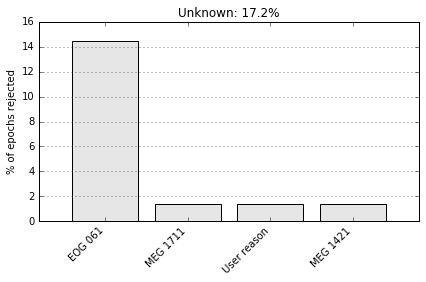

In [61]:
epochs.drop([0],reason='User reason')
epochs.drop_bad(reject=dict(grad=2500e-13, mag=4e-12, eog=200e-6), flat=None)
print(epochs.drop_log)
epochs.plot_drop_log();

In [62]:
print('Selection from original events:\n%s' % epochs.selection)
print('Removed events (from numpy setdiff1d):\n%s'
      % (np.setdiff1d(np.arange(len(events)), epochs.selection).tolist(),))
print('Removed events (from list comprehension -- should match!):\n%s'
      % ([li for li, log in enumerate(epochs.drop_log) if len(log) > 0]))

Selection from original events:
[  4   6   8  10  12  14  19  21  23  25  27  29  31  33  35  38  42  44
  46  48  50  52  54  56  58  63  65  67  69  71  73  75  77  88  90  92
  94  96  98 101 103 105 107 109 111 113 115 117 122 126 128 130 132 134
 136 138 140 142 145 151 153 155 157 159 161 168 170 174 176 178 182 184
 189 191 193 197 199 201 206 214 218 220 222 224 229 231 233 235 237 239
 241 243 245 248 250 252 254 256 258 262 264 269 271 273 281 285 290 292
 294 296 298 300 302 304 306 308 310 313 315 317]
Removed events (from numpy setdiff1d):
[0, 1, 2, 3, 5, 7, 9, 11, 13, 15, 16, 17, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 37, 39, 40, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 60, 61, 62, 64, 66, 68, 70, 72, 74, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 93, 95, 97, 99, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 119, 120, 121, 123, 124, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 144, 146, 147, 148, 149, 150, 152, 154, 156, 158, 160, 162, 163, 164, 165, 166

#### Save Epochs
- you can do it with mne.Epochs.save(). To conform to MNE naming conventions, the epochs file names should end with ' -epo.fif '

In [63]:
epochs_fname = './sample-epo.fif'
epochs.save(epochs_fname)

#### Read Epochs
- you can read the epochs with mne.read_epochs().
- For reading EEGLAB epochs files see mne.read_epochs_eeglab().


We can also use preload=False to save memory, loading the epochs from disk on demand.

In [64]:
epochs = mne.read_epochs(epochs_fname,preload=False)

Reading ./sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
120 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated


#### To export and manipulate Epochs using Pandas see Export epochs to [Pandas DataFrame](https://mne-tools.github.io/0.13/auto_tutorials/plot_epochs_to_data_frame.html#tut-io-export-pandas).

#### If you wish to look at the average across trial types

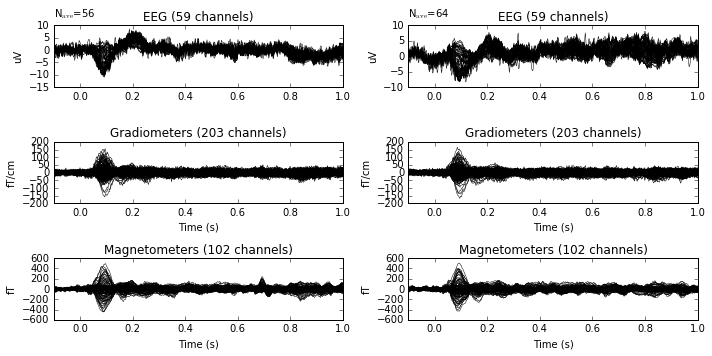

In [75]:

ev_left = epochs['Auditory/Left'].average()
ev_right = epochs['Auditory/Right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
# _ = f.suptitle('Left / Right auditory', fontsize=20)
_ = ev_left.plot(axes=axs[:, 0], show=False)
_ = ev_right.plot(axes=axs[:, 1], show=False)
plt.tight_layout()